In [7]:
import yfinance as yf  # For downloading financial data from Yahoo Finance
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
from statsmodels.tsa.statespace.sarimax import SARIMAX  # For the SARIMA model
from datetime import datetime, timedelta  # For handling date and time

In [8]:
# 1. Downloading the Data
# We set the time range for 5 years back from today and download the Bitcoin (BTC-USD) price data using yfinance.
end_date = datetime.now()  # Current date
start_date = end_date - timedelta(days=365*5)  # 5 years ago from the current date
btc_data = yf.download('BTC-USD', start=start_date, end=end_date)  # Download BTC price data

btc_close = btc_data['Close']  # Extract the 'Close' price data


[*********************100%***********************]  1 of 1 completed


In [9]:
# 2. SARIMA Model Training
# We initialize and fit the SARIMA model on the historical Bitcoin close prices.
sarima_model = SARIMAX(btc_close, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  
# SARIMA parameters: (p, d, q) for the ARIMA part and (P, D, Q, s) for the seasonal part (weekly seasonality here)
sarima_result = sarima_model.fit(disp=False)  # Fit the model, 'disp=False' suppresses output

In [10]:

# 3. 1-Week Forecast
# We generate a 7-day forecast starting from the day after the last available date in the dataset.
forecast = sarima_result.get_forecast(steps=7)  # Forecast for the next 7 days
forecast_index = pd.date_range(start=btc_close.index[-1] + timedelta(days=1), periods=7)  
# Create a date range for the forecast period (7 days after the last historical date)
forecast_values = forecast.predicted_mean  # Predicted mean values for the next 7 days


In [11]:

# 4. Combine Historical and Forecasted Data for Better Visualization
combined_dates = btc_close.index.tolist() + forecast_index.tolist()  # Combine historical and forecast dates
combined_values = btc_close.tolist() + forecast_values.tolist()  # Combine historical and forecast values


In [12]:

# 5. Printing the Forecasted Results
# We print the forecasted Bitcoin prices for the next 7 days, each with its corresponding date.
print("1 Week Bitcoin Forecast:")
for date, price in zip(forecast_index, forecast_values):
    print(f"Date: {date.date()}, Predicted Price: {price:.2f} USD")  # Print forecasted date and price


1 Week Bitcoin Forecast:
Date: 2024-10-22, Predicted Price: 67544.68 USD
Date: 2024-10-23, Predicted Price: 67669.15 USD
Date: 2024-10-24, Predicted Price: 67611.32 USD
Date: 2024-10-25, Predicted Price: 67651.79 USD
Date: 2024-10-26, Predicted Price: 67686.07 USD
Date: 2024-10-27, Predicted Price: 67726.78 USD
Date: 2024-10-28, Predicted Price: 67855.49 USD


In [13]:

# 6. Printing the Actual Close Prices for the Last 1 Week
# We print the actual Bitcoin closing prices for the last 7 days available in the dataset.
print("\nLast 1 Week Actual Bitcoin Closing Prices:")
last_week_actual = btc_close[-7:]  # Select the last 7 days of closing prices
for date, price in zip(last_week_actual.index, last_week_actual.values):
    print(f"Date: {date.date()}, Actual Closing Price: {price:.2f} USD")  # Print actual date and price



Last 1 Week Actual Bitcoin Closing Prices:
Date: 2024-10-15, Actual Closing Price: 67041.11 USD
Date: 2024-10-16, Actual Closing Price: 67612.72 USD
Date: 2024-10-17, Actual Closing Price: 67399.84 USD
Date: 2024-10-18, Actual Closing Price: 68418.79 USD
Date: 2024-10-19, Actual Closing Price: 68362.73 USD
Date: 2024-10-20, Actual Closing Price: 69001.70 USD
Date: 2024-10-21, Actual Closing Price: 67617.08 USD


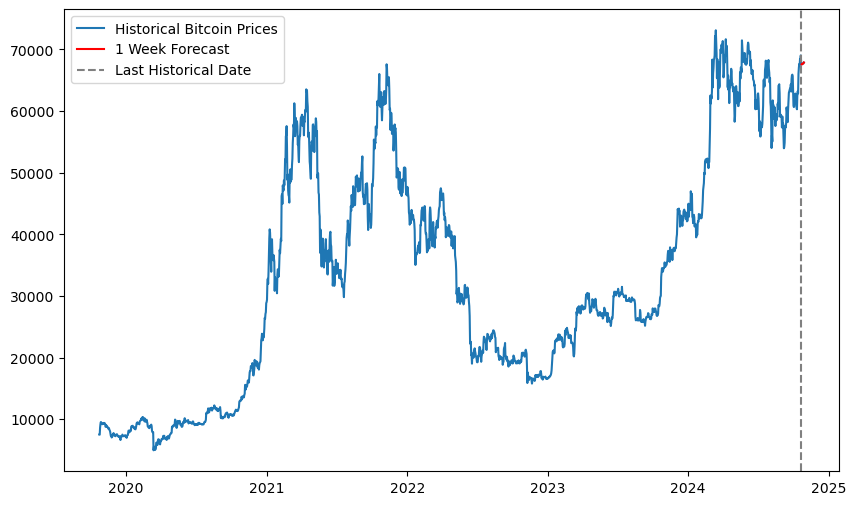

In [14]:

# 7. Plotting the Combined Data
# We plot the historical Bitcoin prices along with the forecasted prices for the next 7 days.
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.plot(combined_dates, combined_values, label='Historical Bitcoin Prices')  # Plot combined data
plt.plot(forecast_index, forecast_values, label='1 Week Forecast', color='red')  # Plot the 1-week forecast in red
plt.axvline(x=btc_close.index[-1], color='gray', linestyle='--', label='Last Historical Date')  # Line for last historical date
plt.legend()  # Display a legend to label the historical and forecasted prices
plt.show()  # Show the plot
